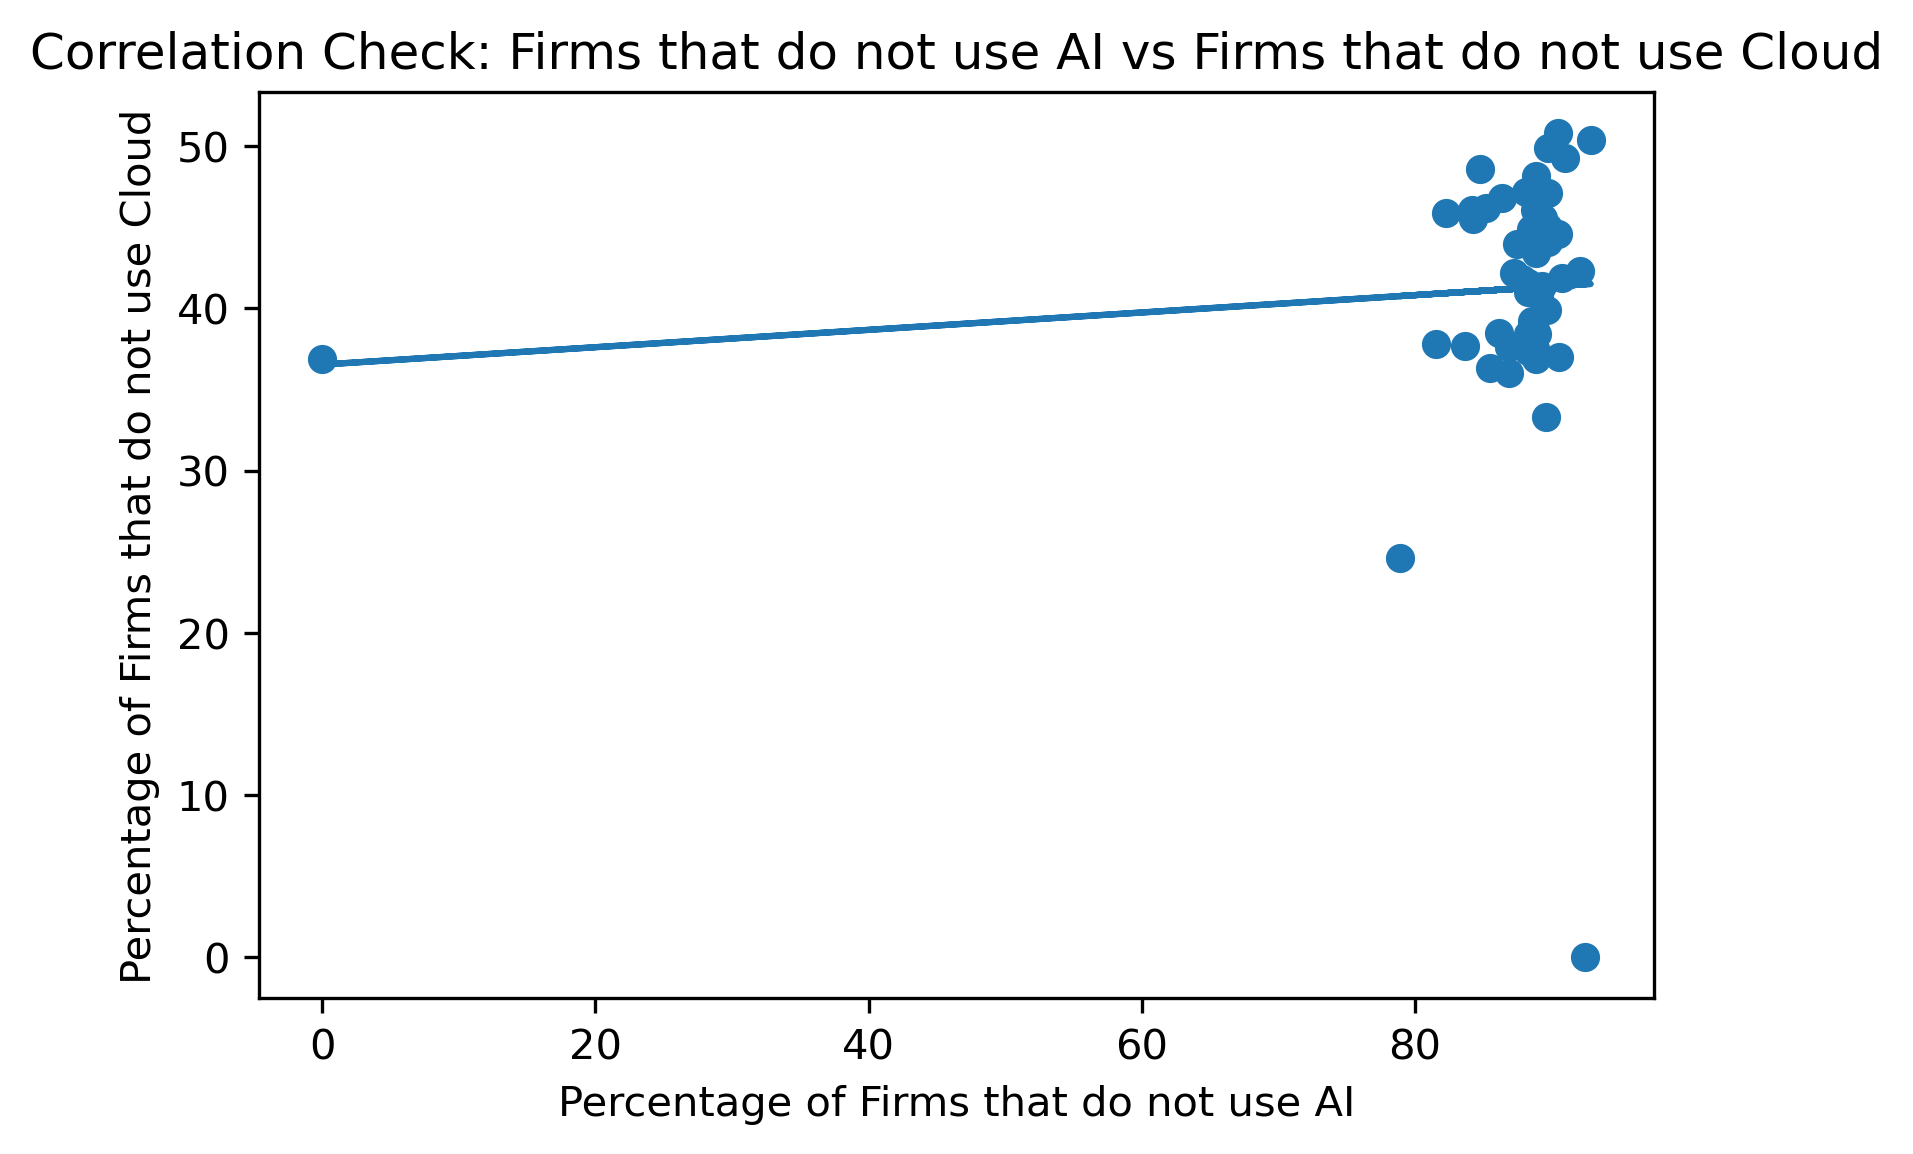

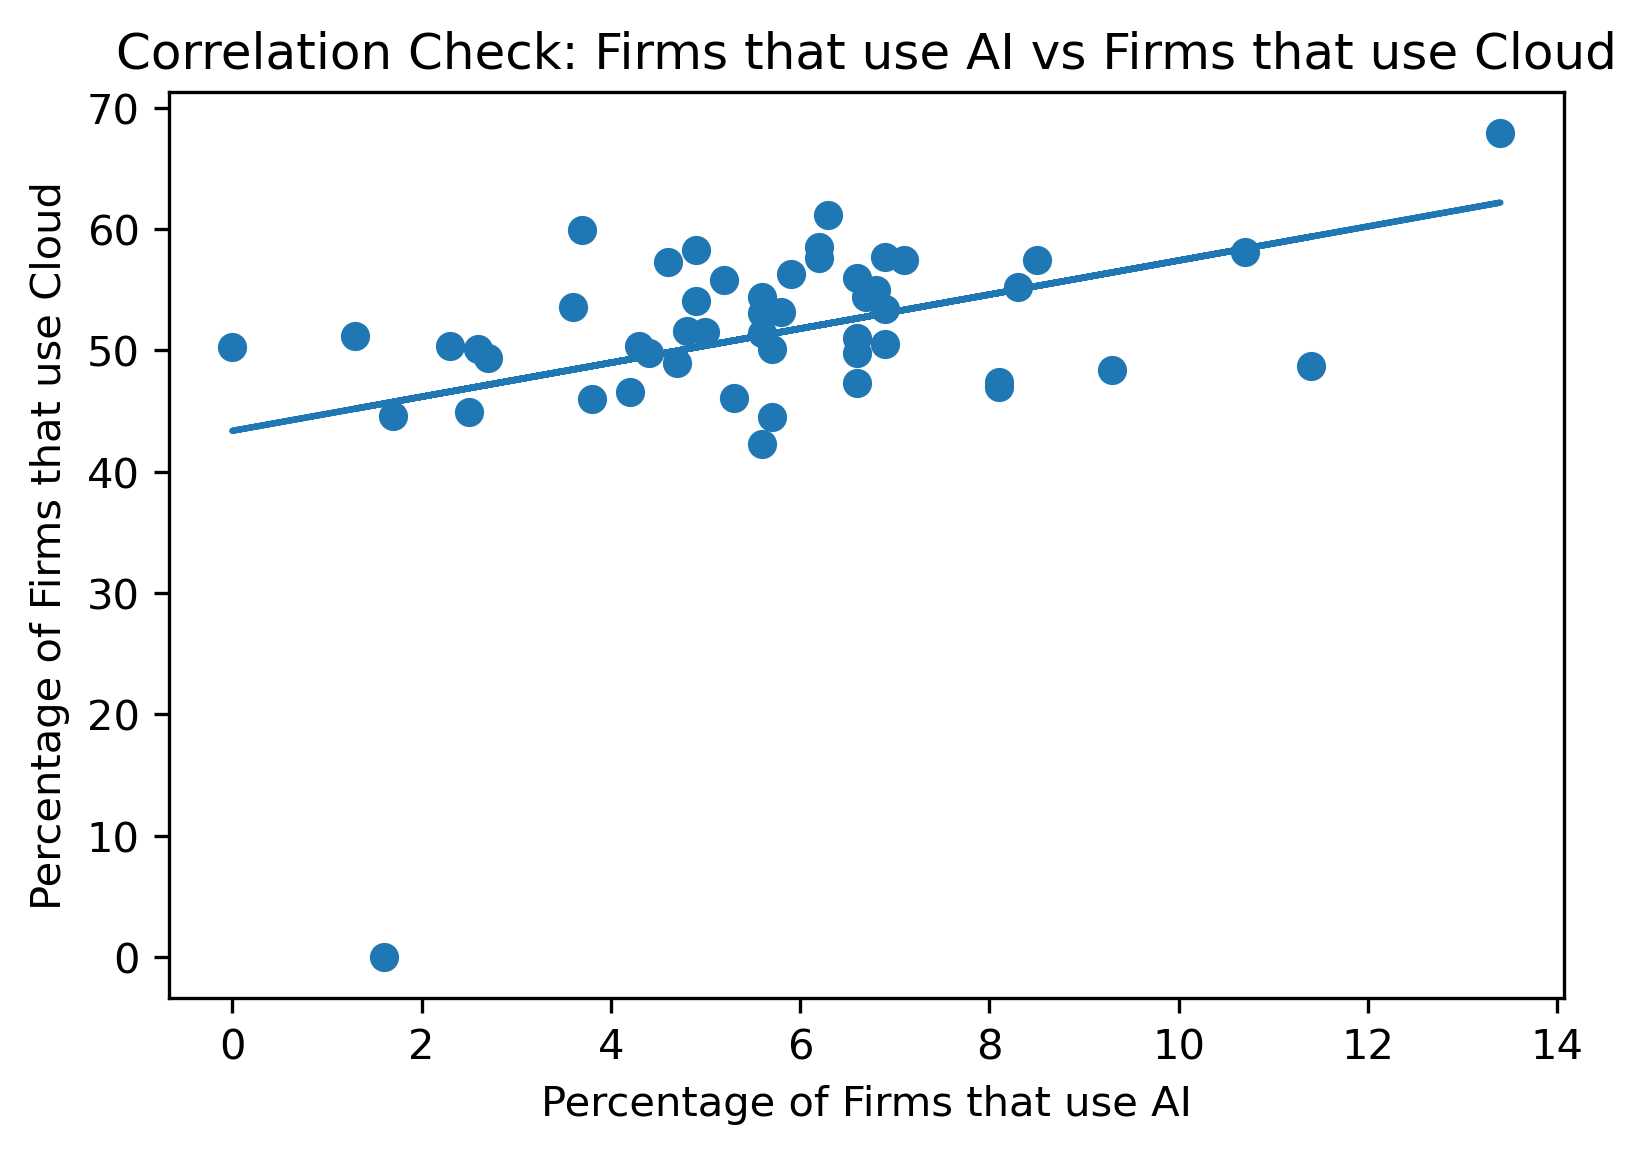

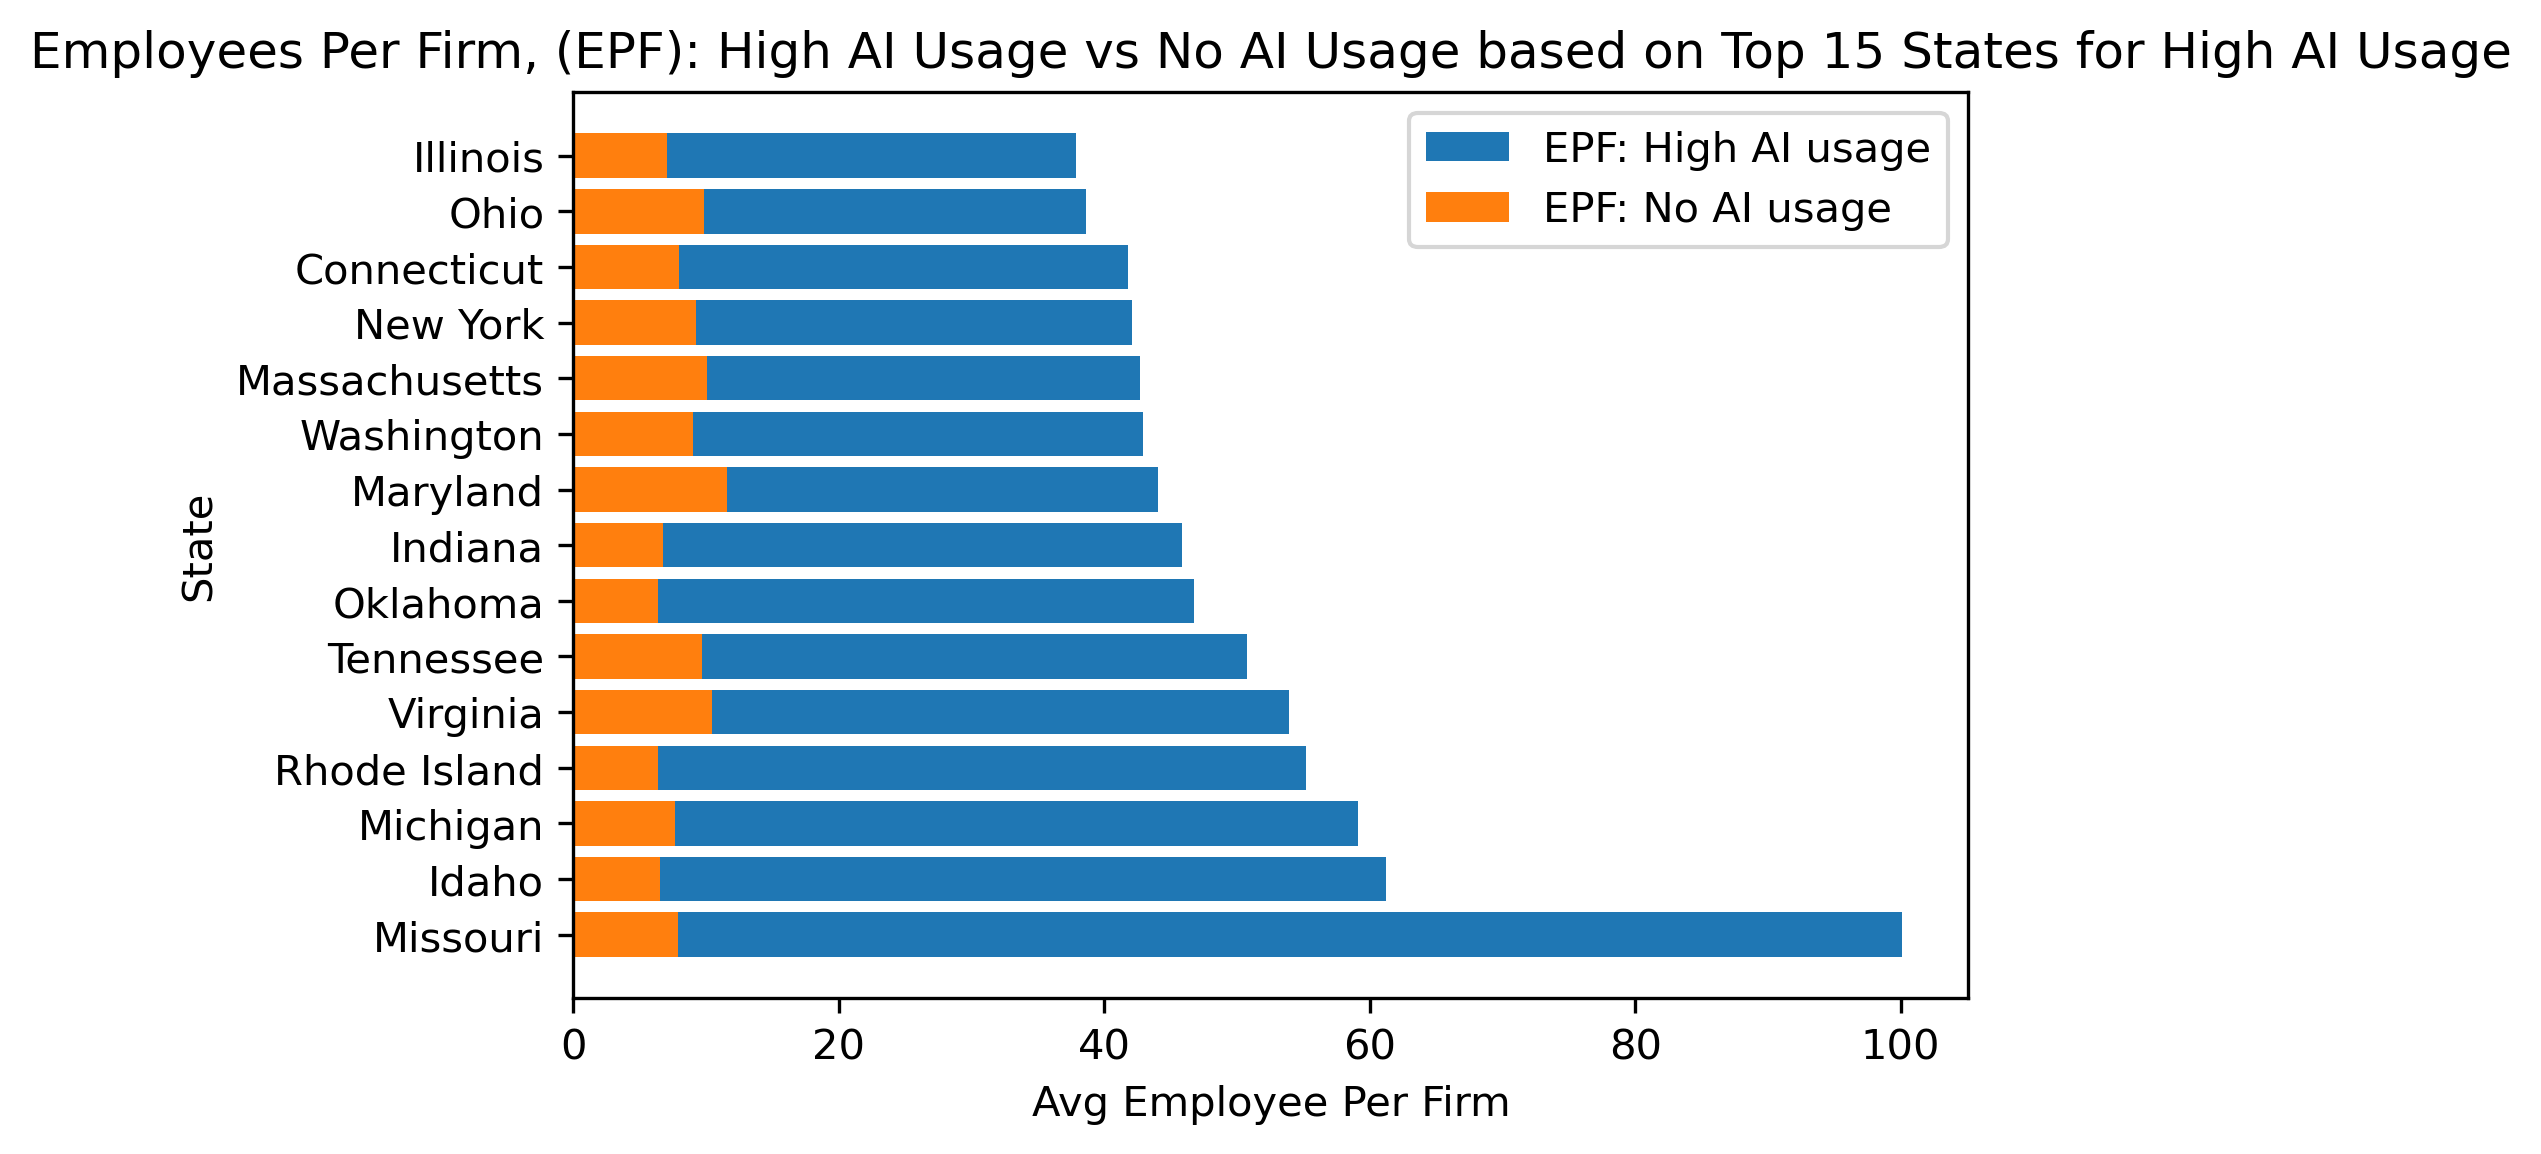

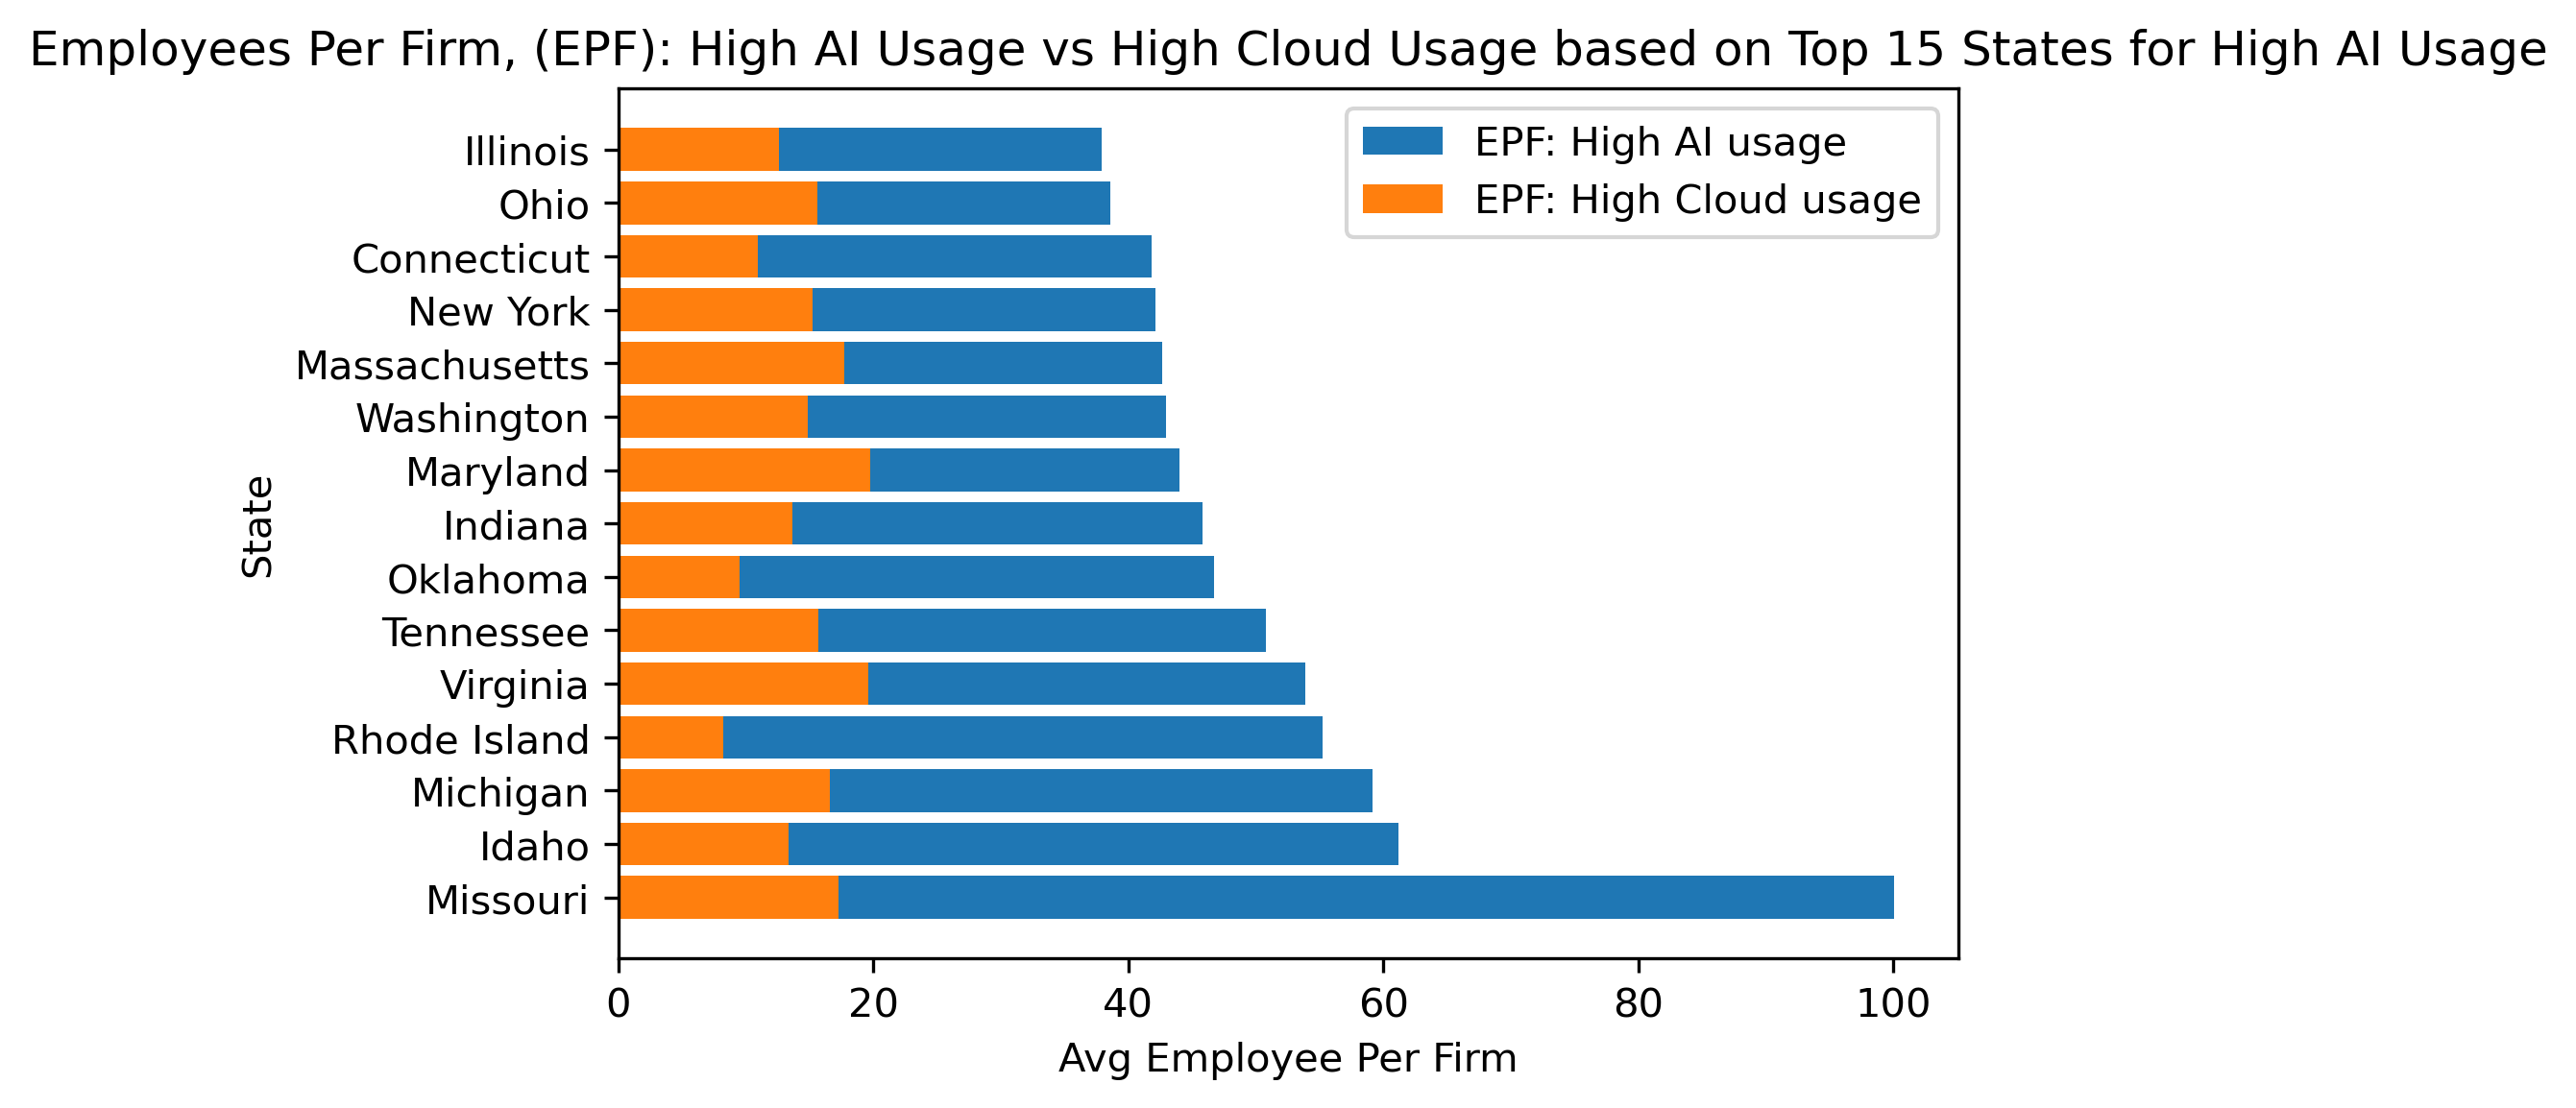

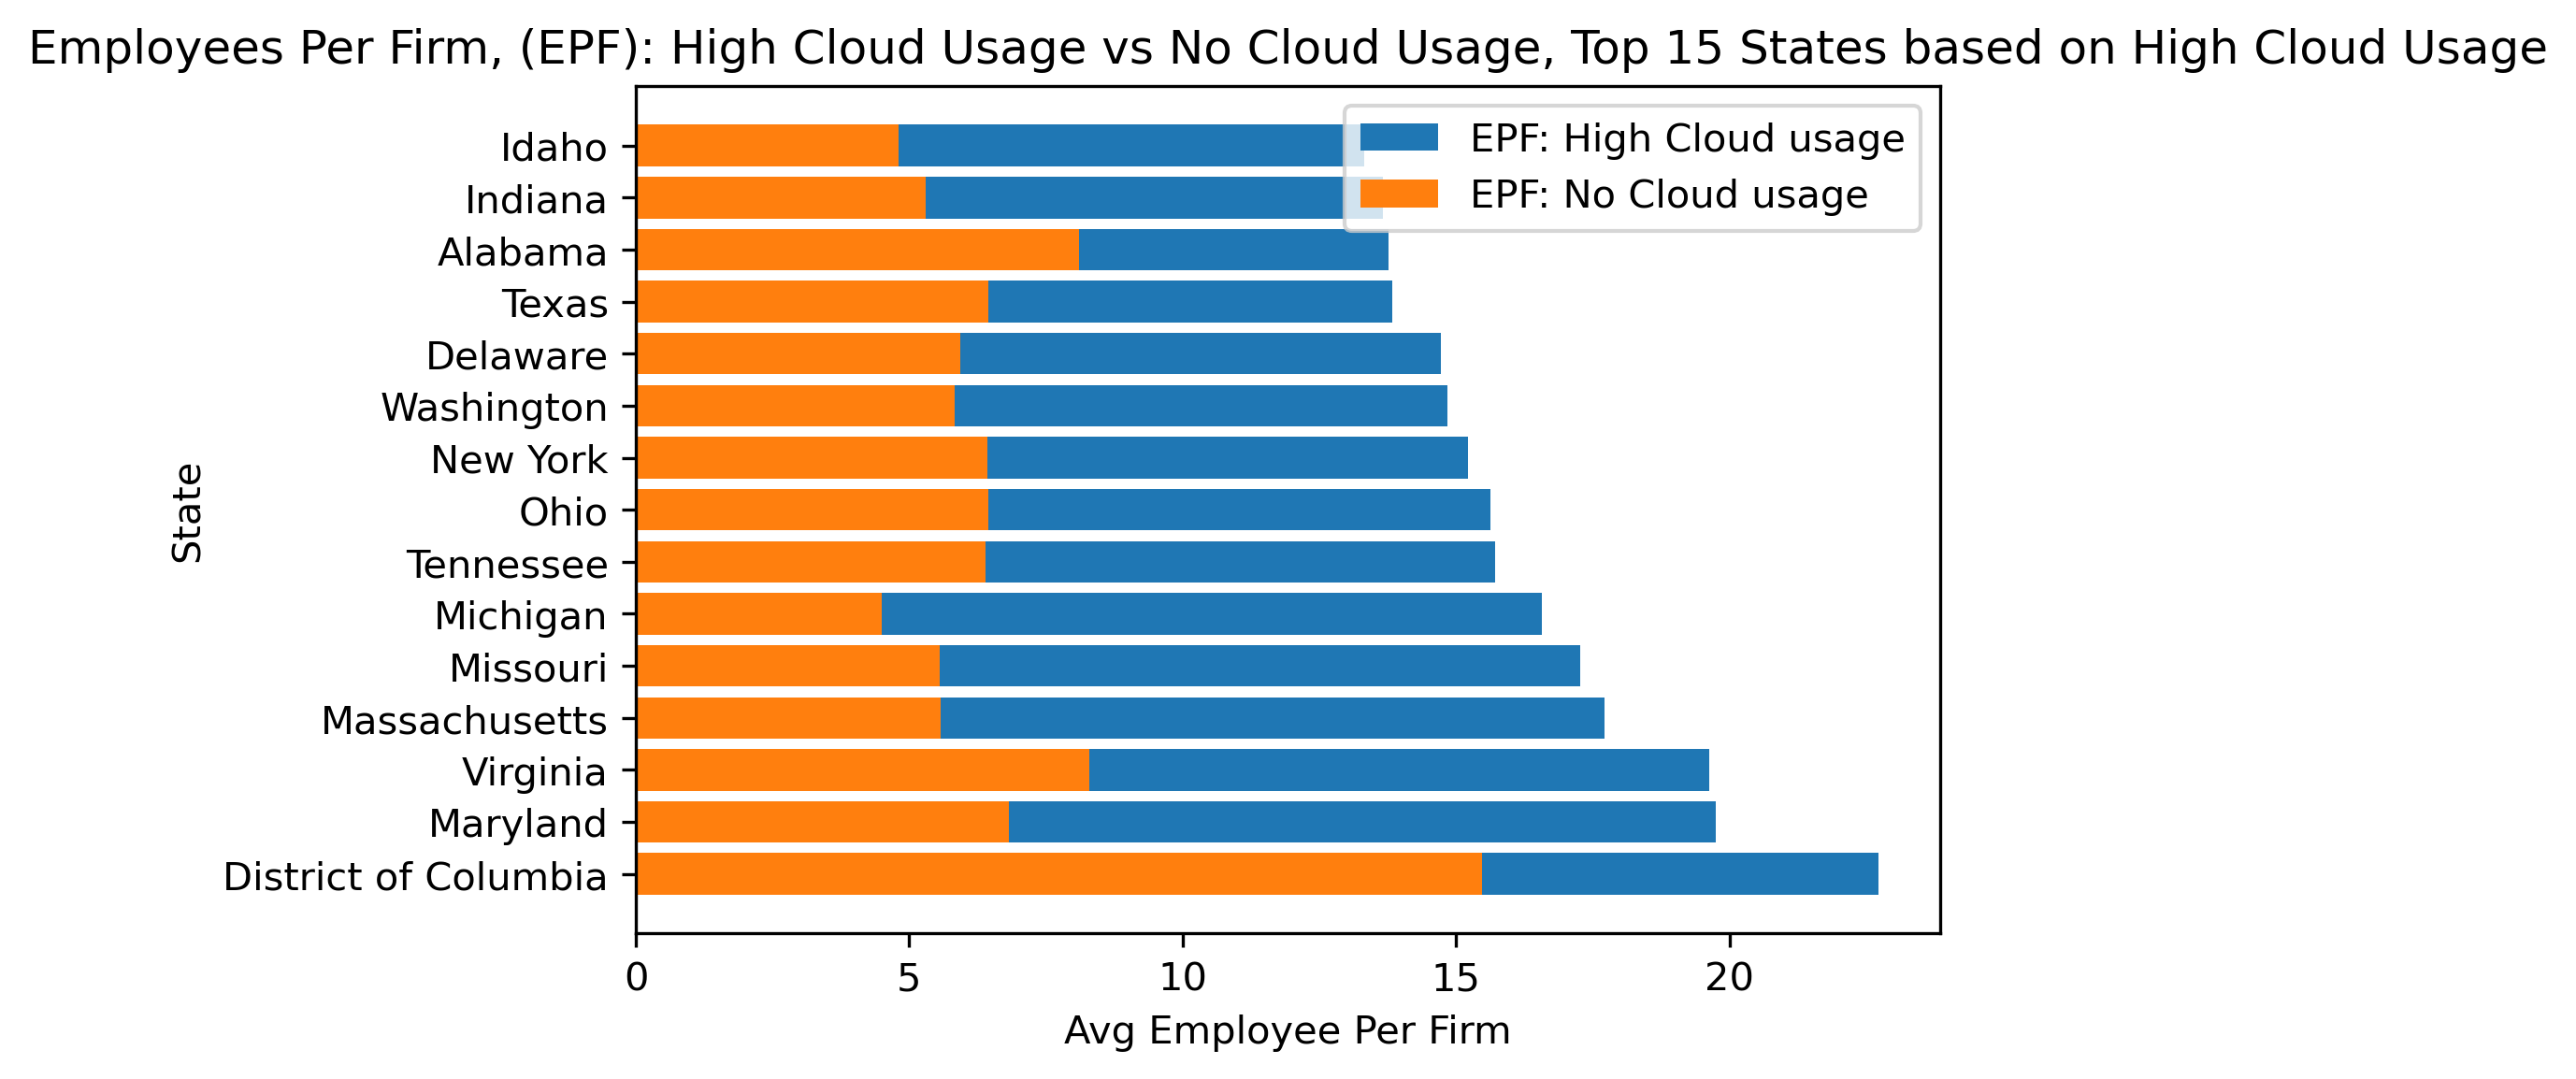

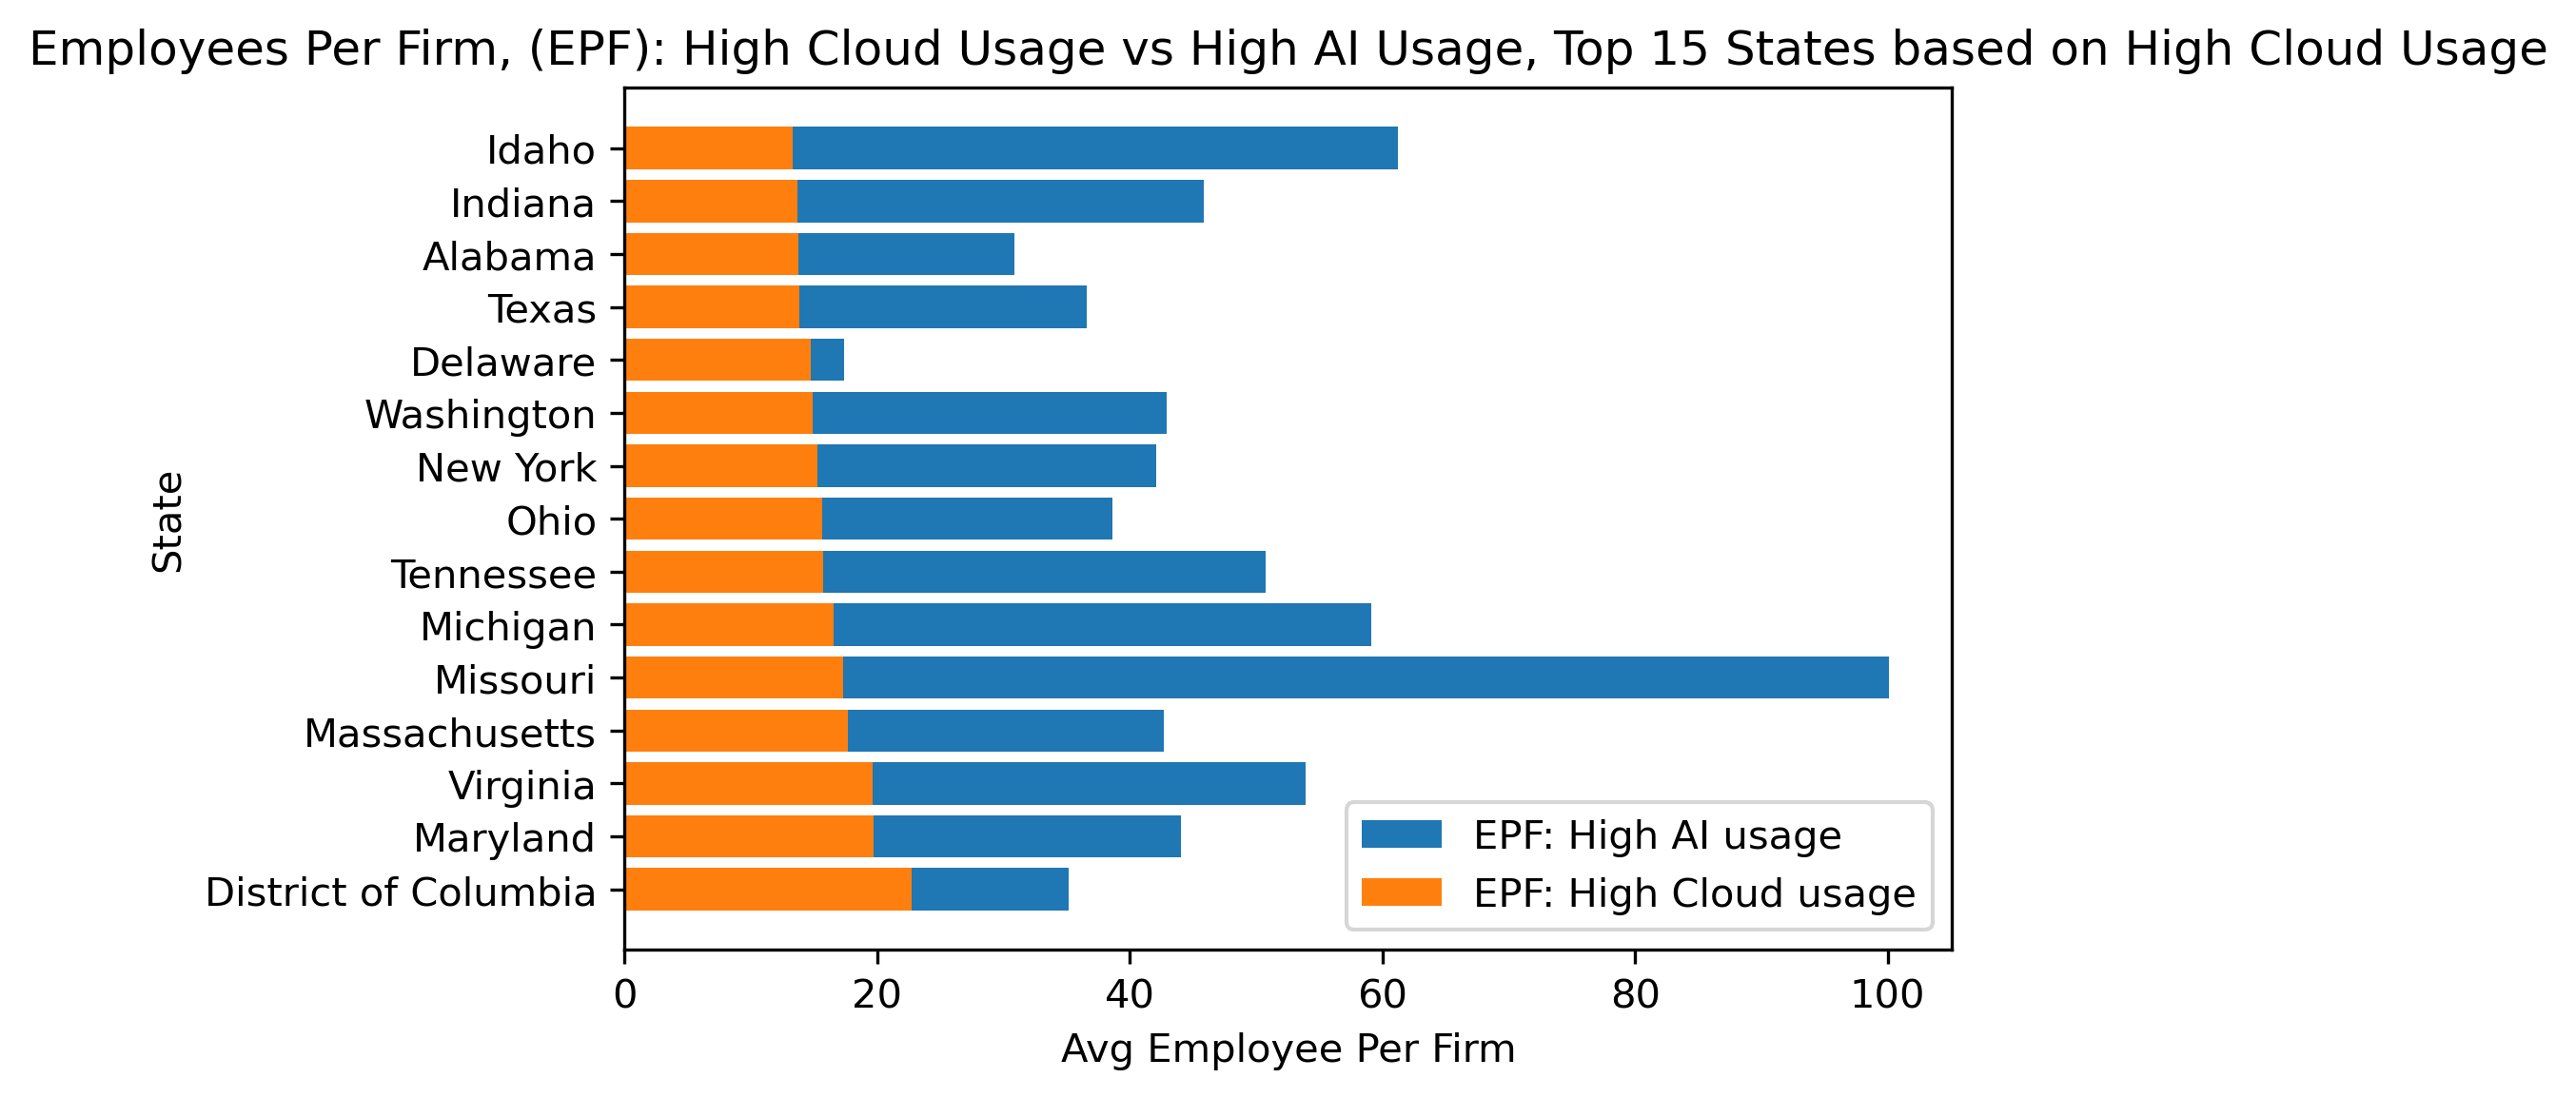

In [1]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt

AIuse = pd.read_csv('csvs/ai_use.csv')
Clouduse = pd.read_csv('csvs/cloud_use.csv')

#merged into one table and found the ratio of employees to firm for each category
AI_Cloud = AIuse.merge(Clouduse, on='State', how='inner')
AI_Cloud['AI_emplyeePerFirm'] = AI_Cloud['TotalEmployeesUsingAI']/AI_Cloud['TotalFirmsUsingAI']
AI_Cloud['NonAI_employeePerFirm'] = AI_Cloud['TotalEmployeesNoAI']/AI_Cloud['TotalFirmsNoAI']
AI_Cloud['Cloud_employeePerFirm'] = AI_Cloud['TotalEmployeesUsingCloud']/AI_Cloud['TotalFirmsUsingCloud']
AI_Cloud['NoCloud_employeePerFirm'] = AI_Cloud['TotalEmployeesNoCloud']/AI_Cloud['TotalFirmsNoCloud']

#correlation check: scatter plot - non ai vs non cloud based on % of firms 
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.scatter(AI_Cloud['PercentFirmsNoAI'],  AI_Cloud['PercentFirmsNoCloud'])
z = numpy.polyfit(AI_Cloud['PercentFirmsNoAI'],  AI_Cloud['PercentFirmsNoCloud'], 1)
p = numpy.poly1d(z)
ax.plot(AI_Cloud['PercentFirmsNoAI'], p(AI_Cloud['PercentFirmsNoAI']))
ax.set_xlabel('Percentage of Firms that do not use AI')
ax.set_ylabel('Percentage of Firms that do not use Cloud')
ax.set_title('Correlation Check: Firms that do not use AI vs Firms that do not use Cloud')
plt.show()

#correlation check: scatter plot - high ai vs high cloud based on % of firms
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.scatter(AI_Cloud['PercentFirmsUsingAI'],  AI_Cloud['PercentFirmsUsingCloud'])
z = numpy.polyfit(AI_Cloud['PercentFirmsUsingAI'],  AI_Cloud['PercentFirmsUsingCloud'], 1)
p = numpy.poly1d(z)
ax.plot(AI_Cloud['PercentFirmsUsingAI'], p(AI_Cloud['PercentFirmsUsingAI']))
ax.set_xlabel('Percentage of Firms that use AI')
ax.set_ylabel('Percentage of Firms that use Cloud')
ax.set_title('Correlation Check: Firms that use AI vs Firms that use Cloud')
plt.show()


#looking at firms that use AI - high AI usage vs low AI usage, top 15 states based on high AI usage
sortHighAI = AI_Cloud.sort_values('AI_emplyeePerFirm', ascending=False)
top_HighAI = sortHighAI.head(15)
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.barh(top_HighAI['State'], top_HighAI['AI_emplyeePerFirm'], label='EPF: High AI usage')
ax.barh(top_HighAI['State'], top_HighAI['NonAI_employeePerFirm'], label='EPF: No AI usage')
ax.set_ylabel('State')
ax.set_xlabel('Avg Employee Per Firm')
ax.set_title('Employees Per Firm, (EPF): High AI Usage vs No AI Usage based on Top 15 States for High AI Usage')
ax.legend()
plt.show()

#looking at how firms that have high cloud usage compared to those that have high AI usage in top 15 high AI states
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.barh(top_HighAI['State'], top_HighAI['AI_emplyeePerFirm'], label='EPF: High AI usage')
ax.barh(top_HighAI['State'], top_HighAI['Cloud_employeePerFirm'], label='EPF: High Cloud usage')
ax.set_ylabel('State')
ax.set_xlabel('Avg Employee Per Firm')
ax.set_title('Employees Per Firm, (EPF): High AI Usage vs High Cloud Usage based on Top 15 States for High AI Usage')
ax.legend()
plt.show()

#looking at firms that have high cloud usage - high cloud vs low cloud, top 15 states on high cloud
sortHighCloud = AI_Cloud.sort_values('Cloud_employeePerFirm', ascending=False)
top_HighCloud = sortHighCloud.head(15)
top_HighCloud
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.barh(top_HighCloud['State'], top_HighCloud['Cloud_employeePerFirm'], label='EPF: High Cloud usage')
ax.barh(top_HighCloud['State'], top_HighCloud['NoCloud_employeePerFirm'], label='EPF: No Cloud usage')
ax.set_ylabel('State')
ax.set_xlabel('Avg Employee Per Firm')
ax.set_title('Employees Per Firm, (EPF): High Cloud Usage vs No Cloud Usage, Top 15 States based on High Cloud Usage')
ax.legend()
plt.show()

#looking at firms that have high ai usage compared to those that have high cloud usage in top 15 high cloud states
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.barh(top_HighCloud['State'], top_HighCloud['AI_emplyeePerFirm'], label='EPF: High AI usage')
ax.barh(top_HighCloud['State'], top_HighCloud['Cloud_employeePerFirm'], label='EPF: High Cloud usage')
ax.set_ylabel('State')
ax.set_xlabel('Avg Employee Per Firm')
ax.set_title('Employees Per Firm, (EPF): High Cloud Usage vs High AI Usage, Top 15 States based on High Cloud Usage')
ax.legend()
plt.show()
